# Simple Linear Regression

We are applying a machine learning algorithm to the dataset houseprice_data.csv which can be downloaded from the assignment task on
canvas. This data set contains information about house sales in King County, USA. The data has 18 features, such as: number of bedrooms, bathrooms, floors etc., and
a target variable: house price.

Using linear regression (simple or multiple), develop a model to predict the price
of a house. After developing the model you should also analyse the results and
discuss the effectiveness of the model, outlining the improvements when developing
the model.

## Data Preparation

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

import warnings;warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
df = pd.read_csv('houseprice_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Exploring Data

In [3]:
print(df.columns.tolist())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


**Meaning of Columns in the dataset** <br>

1. 'price': This is the target variable, representing the price of the house or property. This is what you are trying to predict in a house price prediction model.

2. 'bedrooms': The number of bedrooms in the house.

3. 'bathrooms': The number of bathrooms in the house.

4. 'sqft_living': The total living area in square feet.

5. 'sqft_lot': The total lot area in square feet.

6. 'floors': The number of floors in the house.

7. 'waterfront': A binary column (usually 0 or 1) indicating whether the property has a waterfront view.

8. 'view': A rating of the view from the property, typically on a scale from 0 to 4 or a similar range.

9. 'condition': A rating of the overall condition of the house, often on a scale from 1 to 5.

10. 'grade': A rating of the overall quality of construction and design of the house, often on a scale from 1 to 13 or a similar range.

11. 'sqft_above': The square footage of the house above ground level.

12. 'sqft_basement': The square footage of the basement in the house.

13. 'yr_built': The year the house was built.

14. 'yr_renovated': The year the house was last renovated. If it has never been renovated, this column may contain a default value (e.g., 0).

15. 'zipcode': The ZIP code of the location of the property.

16. 'lat': The latitude coordinate of the property.

17. 'long': The longitude coordinate of the property.

18. 'sqft_living15': The square footage of the house's interior living space for the nearest 15 neighbors.

19. 'sqft_lot15': The square footage of the land lot for the nearest 15 neighbors.

In [4]:
# dimension of data
print(df.shape)
# summary of data
df.info()

(21613, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  

Converting discrete columns from integer to categorical

In [5]:
# Convert the columns to categorical data with specified categories and order
df['grade'] = pd.Categorical(df['grade'],  ordered=True)
df['condition'] = pd.Categorical(df['condition'],  ordered=True)
df['view'] = pd.Categorical(df['view'],  ordered=True)
df['waterfront'] = pd.Categorical(df['waterfront'],  ordered=True)

In [6]:
!pip install skimpy

from skimpy import skim

   ---------------------------------------- 0.0/28.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/28.8 MB 1.7 MB/s eta 0:00:18
   ---------------------------------------- 0.1/28.8 MB 1.7 MB/s eta 0:00:18
   ---------------------------------------- 0.2/28.8 MB 1.4 MB/s eta 0:00:21
   ---------------------------------------- 0.2/28.8 MB 1.2 MB/s eta 0:00:23
   ---------------------------------------- 0.3/28.8 MB 1.2 MB/s eta 0:00:24
   ---------------------------------------- 0.3/28.8 MB 1.2 MB/s eta 0:00:24
   ---------------------------------------- 0.3/28.8 MB 1.2 MB/s eta 0:00:24
   ---------------------------------------- 0.3/28.8 MB 1.2 MB/s eta 0:00:24
    --------------------------------------- 0.4/28.8 MB 983.6 kB/s eta 0:00:29
    --------------------------------------- 0.4/28.8 MB 949.4 kB/s eta 0:00:30
    --------------------------------------- 0.5/28.8 MB 909.8 kB/s eta 0:00:32
    --------------------------------------- 0.5/28.8 MB 879.9 kB/s eta 0:00:3

In [7]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 21613  │ │ int32       │ 10    │ │ waterfront            │                                │
│ │ Number of columns │ 19     │ │ float64     │ 5     │ │ view                  │                                │
│ └───────────────────┴────────┘ │ category    │ 4     │ │ condition             │                                │
│                                └─────────────┴───────┘ │ grade                 │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ price           │   0 │     0 │  540200 │  367400 │   75000 │  322000 │ 450000 │ 645000 │ 7700000 │   ▇    │  │
│ │ bedrooms        │   0 │     0 │   3.371 │  0.9301 │       0 │       3 │      3 │      4 │      33 │   ▇    │  │
│ │ bathrooms       │   0 │     0 │   2.115 │  0.7702 │       0 │    1.75 │   2.25 │    2.5 │       8 │  ▂▇▂   │  │
│ │ sqft_living     │   0 │     0 │    2080 │   918.4 │     290 │    1427 │   1910 │   2550 │   13540 │   ▇▃   │  │
│ │ sqft_lot        │   0 │     0 │   15110 │   41420 │     520 │    5040 │   7618 │  10690 │ 1651000 │   ▇    │  │
│ │ floors          │   0 │     0 │   1.494 │    0.54 │       1 │       1 │    1.5 │      2 │     3.5 │  ▇▁▆   │  │
│ │ sqft_above      │   0 │     0 │    1788 │   828.1 │     290 │    1190 │   1560 │   2210 │    9410 │  ▇▅▁   │  │
│ │ sqft_basement   │   0 │     0 │   291.5 │   442.6 │       0 │       0 │      0 │    560 │    4820 │   ▇▁   │  │
│ │ yr_built        │   0 │     0 │    1971 │   29.37 │    1900 │    1951 │   1975 │   1997 │    2015 │ ▂▂▅▆▇▇ │  │
│ │ yr_renovated    │   0 │     0 │    84.4 │   401.7 │       0 │       0 │      0 │      0 │    2015 │   ▇    │  │
│ │ zipcode         │   0 │     0 │   98080 │   53.51 │   98000 │   98030 │  98060 │  98120 │   98200 │ ▇▇▂▇▃▂ │  │
│ │ lat             │   0 │     0 │   47.56 │  0.1386 │   47.16 │   47.47 │  47.57 │  47.68 │   47.78 │  ▃▃▇▇▇ │  │
│ │ long            │   0 │     0 │  -122.2 │  0.1408 │  -122.5 │  -122.3 │ -122.2 │ -122.1 │  -121.3 │  ▅▇▃▁  │  │
│ │ sqft_living15   │   0 │     0 │    1987 │   685.4 │     399 │    1490 │   1840 │   2360 │    6210 │  ▂▇▃▁  │  │
│ │ sqft_lot15      │   0 │     0 │   12770 │   27300 │     651 │    5100 │   7620 │  10080 │  871200 │   ▇    │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %           ┃ ordered               ┃ unique             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ waterfront                       │         0 │      

We can confirm from the above table that the column data type of the discrete columns have been changed to category data type.

#### Checking for missing values

In [8]:
# checking for missing values
missing_val = pd.concat([df.isnull().sum(), (df.isnull().mean() * 100).round(2)], axis=1, keys=['Total', '%'])
missing_val = missing_val[missing_val['Total'] > 0].sort_values(by='Total', ascending=False)
print('Checking for null values in the dataset')
missing_val

Checking for null values in the dataset


,Total,%


As can be seen above, there are no missing values in the dataset.

In [9]:
# Generate descriptive statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Checking Correlation of Feature variables with the Target variable, `price`.

In [10]:
# store the correlation and p-value results
results_df = pd.DataFrame(columns=['Feature', 'Correlation with Price', 'P-Value'])

for column in df.columns:
    if column != 'price':
        correlation, p_value = stats.pearsonr(df[column], df['price'])
        results_df = pd.concat([results_df, pd.DataFrame({'Feature': [column], 'Correlation with Price': [correlation], 'P-Value': [p_value]})], ignore_index=True)

# Sorting the DataFrame by the absolute correlation values in descending order
results_df = results_df.sort_values(by='Correlation with Price', ascending=False, key=abs)
results_df

,Feature,Correlation with Price,P-Value
2,sqft_living,0.702044,0.000000e+00
8,grade,0.667463,0.000000e+00
9,sqft_above,0.605566,0.000000e+00
16,sqft_living15,0.585374,0.000000e+00
1,bathrooms,0.525134,0.000000e+00
6,view,0.397346,0.000000e+00
10,sqft_basement,0.323837,0.000000e+00
0,bedrooms,0.308338,0.000000e+00
14,lat,0.306919,0.000000e+00
5,waterfront,0.266331,0.000000e+00


**Interpretation of Results.**  <br><br>

1. **Correlation Strength**:
   - Stronger correlations are indicated by higher absolute values of correlation coefficients, which range from -1 to 1. For instance, a high positive correlation (0.70) between 'price' and 'sqft_living' indicates a strong positive linear relationship.

2. **Statistical Significance**:
   - Strong statistical evidence suggests that these correlations are not due to random chance, as the p-values for all features are very close to 0 (rounded to 0.00). This means that the correlations are statistically significant.

3. **Direction of Correlation**:
   - As the feature value increases, 'price' tends to increase as well for positive correlations (coefficients > 0). Conversely, as the feature value increases, 'price' tends to decrease for negative correlations (coefficients < 0).

4. **Feature Importance**:
   - Features with higher absolute correlation coefficients, such as 'sqft_living,' 'bathrooms,' 'grade,' and 'sqft_above,' are likely to have a more substantial impact on predicting the house price.

5. **Some Weak Correlations**:
   - Suggesting that these features have a less pronounced impact on house prices, 'sqft_lot' and 'condition' have relatively weak positive correlations (0.09 and 0.04, respectively) with 'price.'

6. **Zipcode and Longitude**: There is little to no linear relationship between these features and 'price,' as both 'zipcode' and 'long' have very low correlation coefficients.

7. **Lat and Long**: The latitude of the property location has some impact on house prices, as 'lat' has a moderate positive correlation (0.31).

## Exploratory Data Analysis
In the Exploratory Data Analysis (EDA) section, the dataset will be investigated and its main features summarized. The primary goal of EDA is to help understand and summarize the contents of a dataset, typically with a specific question in mind, or to prepare for more advanced statistical modeling in future stages of data analysis

In [11]:
# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]

# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)

# Use the custom palette with a seaborn function
sns.set_palette(my_palette)

from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

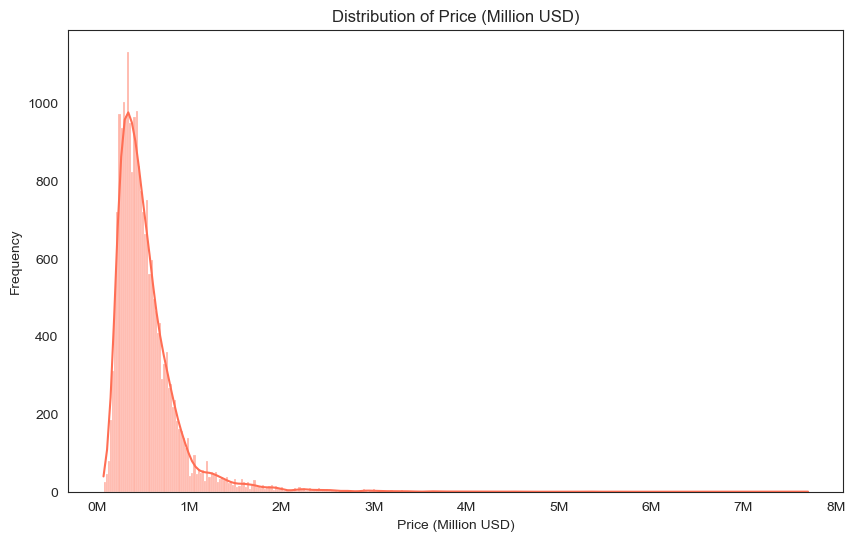

In [12]:
# price distribution with histogram
plt.figure(figsize=[10,6])
sns.histplot(df['price'], kde=True).set(title='Distribution of Price (Million USD)',
                             xlabel='Price (Million USD)', ylabel='Frequency')
x_data = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
x_labels = [f'{int(x / 1e6)}M' for x in x_data]
plt.xticks(x_data, x_labels)
plt.show;

The distribution of prices is positively skewed as the longer tail is on the right side of the histogram. The majority of prices are between 0 and 1 million USD. There is a sharp decrease in frequency as the price increases, with very few prices above 4 million USD. The plot is a smooth curve, with a sharp peak at around 0.5 million USD. This suggests that most houses in the dataset are relatively affordable, with only a few high-end properties.


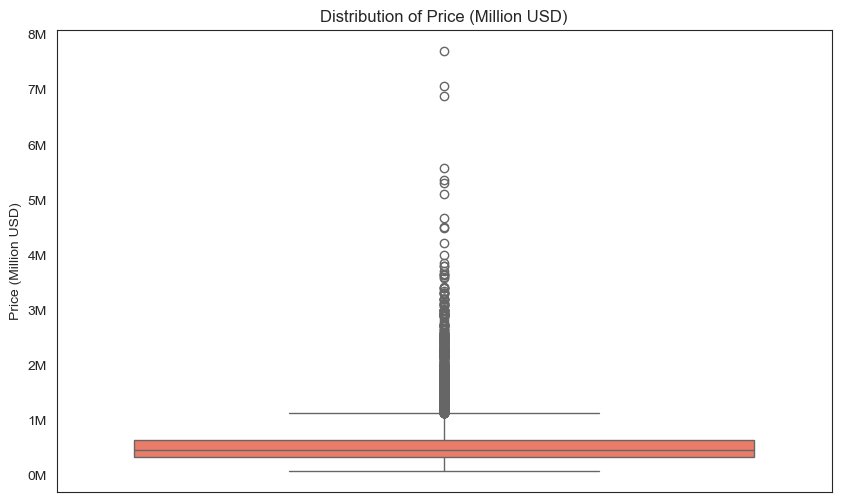

In [13]:
# price distribution using boxplot
plt.figure(figsize=[10,6])
sns.boxplot(df['price']).set(title='Distribution of Price (Million USD)',
                             ylabel='Price (Million USD)')
y_data = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
y_labels = [f'{int(y / 1e6)}M' for y in y_data]
plt.yticks(y_data, y_labels)
plt.show;

From the distribution of prices in this plot, it appears that the majority of prices fall between 0 and 2 million USD, with a few outliers above 2 million USD. This suggests that the prices are not evenly distributed and that there may be a few high-priced items skewing the distribution. with a large number of points between 0 and 2 million USD, and a few outliers above 2 million USD.  The average of the prices is pegged at 0.5million dollars with the median of prices also in that range too.

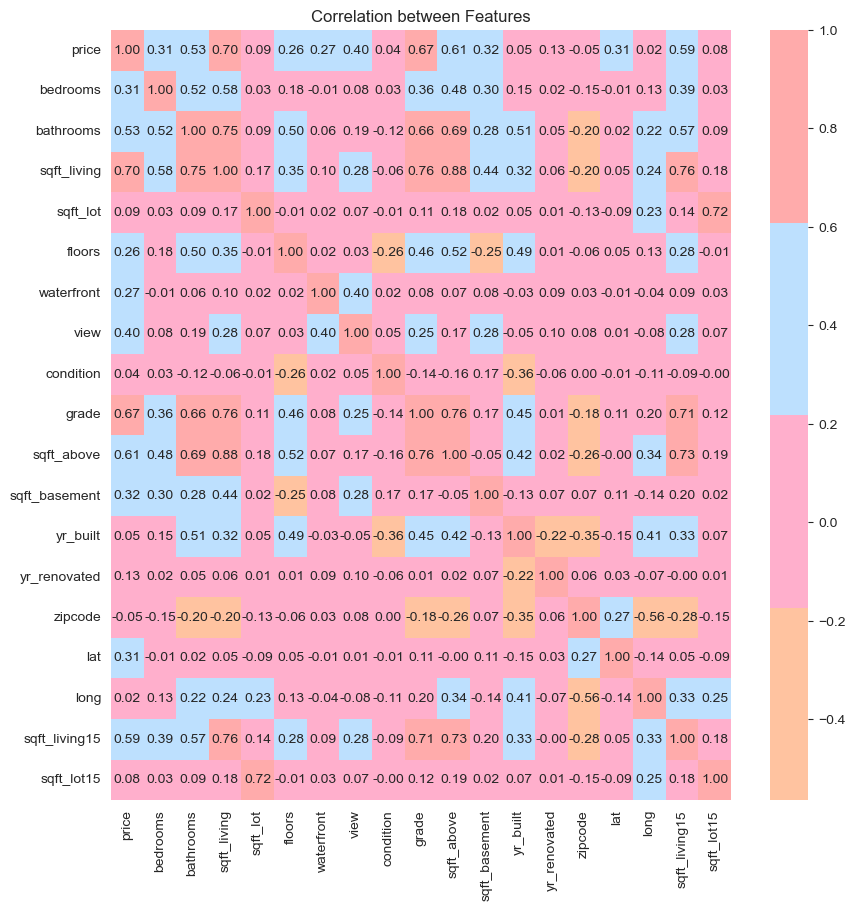

In [14]:
# correlation between features
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(), annot=True, cmap=cmap, fmt='.2f').set(title='Correlation between Features')
plt.show;

From the heatmap of correlation of features in this plot,it can be deduced that there is a strong positive correlation between 'price' and 'sqft_living', 'sqft_above', and 'sqft_living15'. There is also a strong negative correlation between 'price' and 'yr_built', and 'sqft_lot15'. This means that as the price increases, the 'sqft_living', 'sqft_above', and 'sqft_living15' also increase, and as the price decreases, the 'yr_built' and 'sqft_lot15' also decreases.

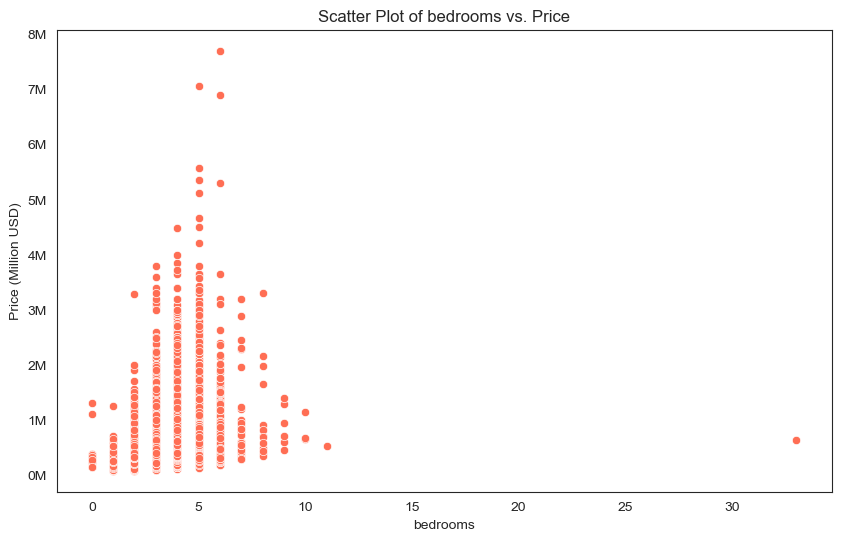

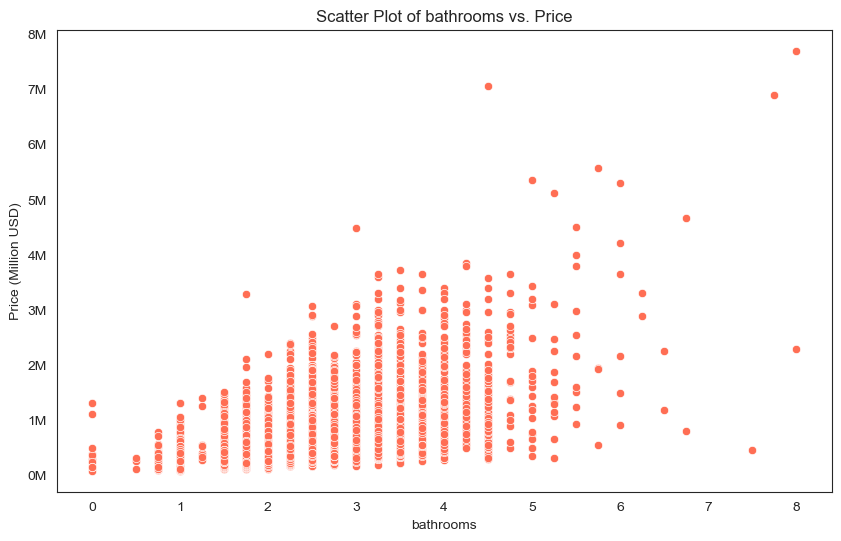

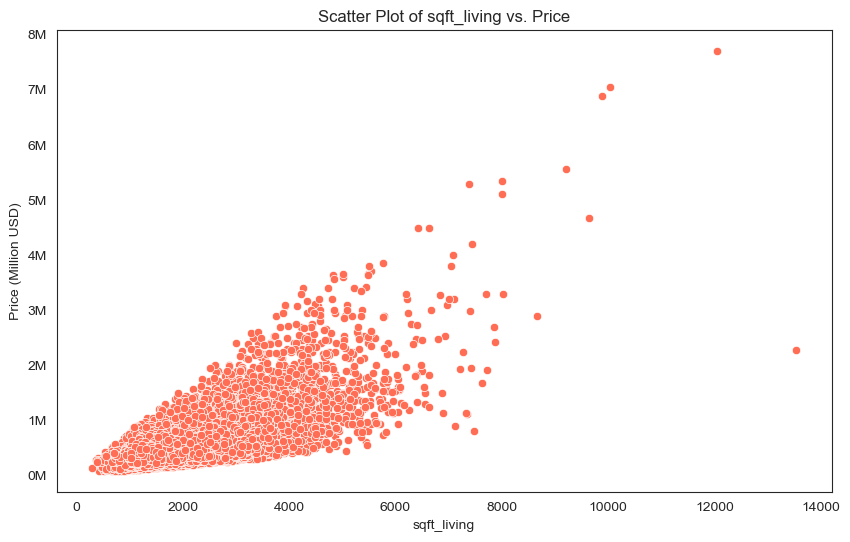

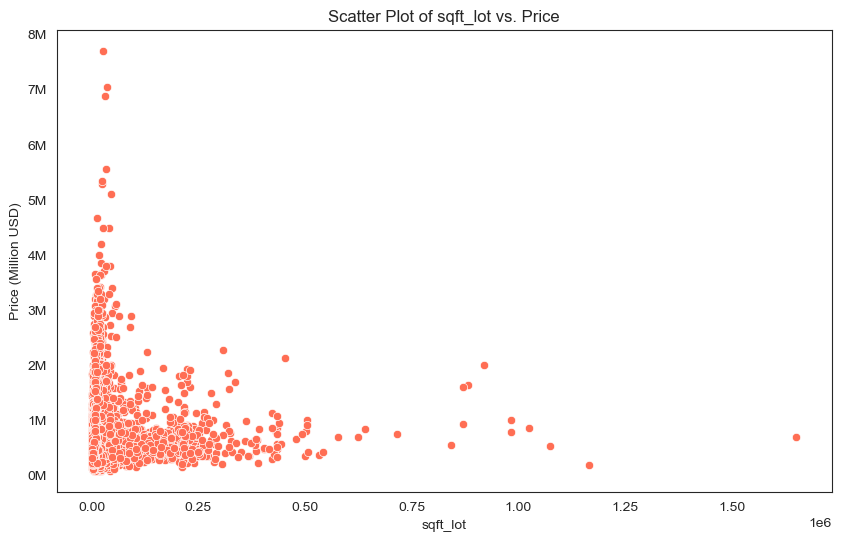

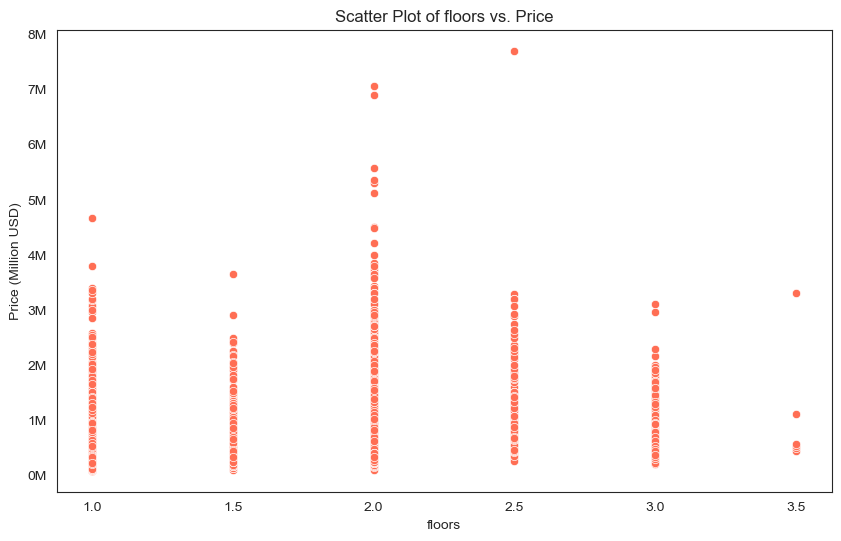

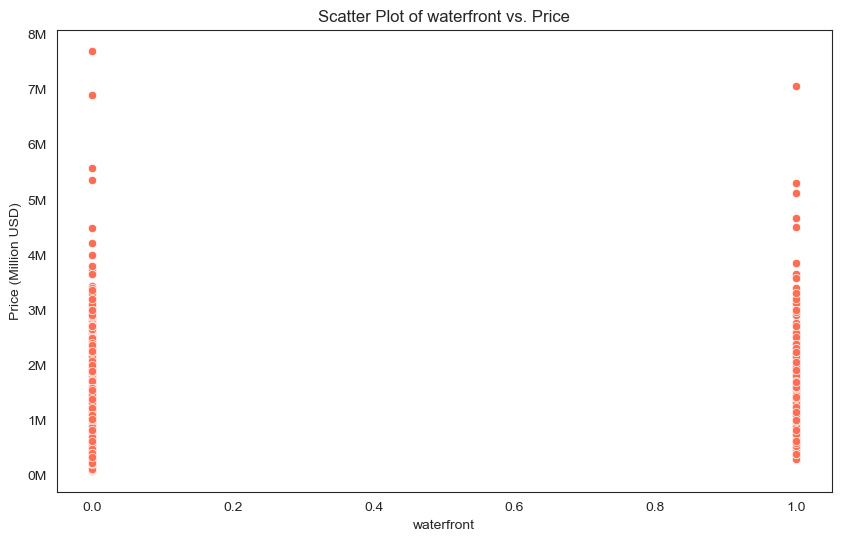

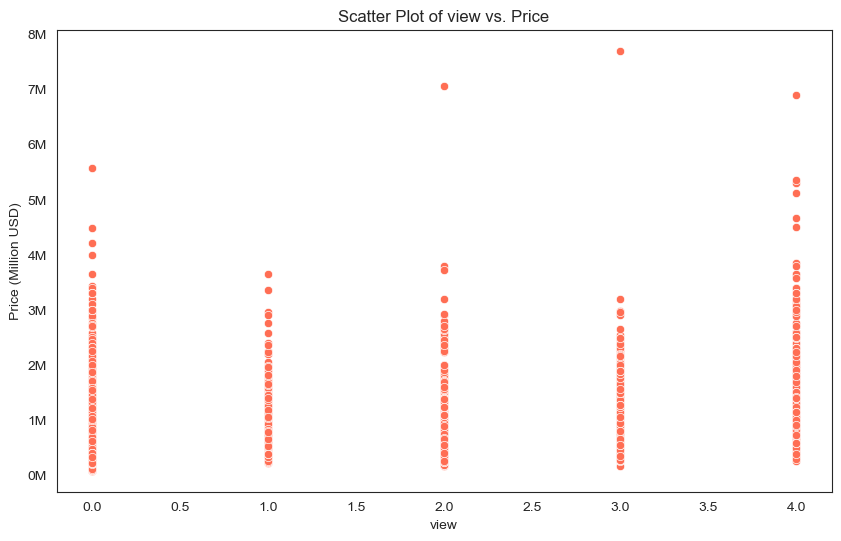

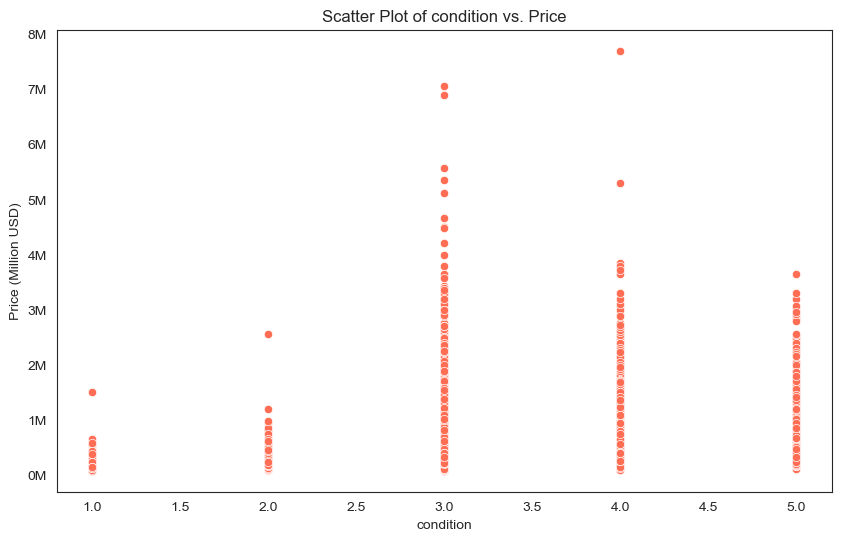

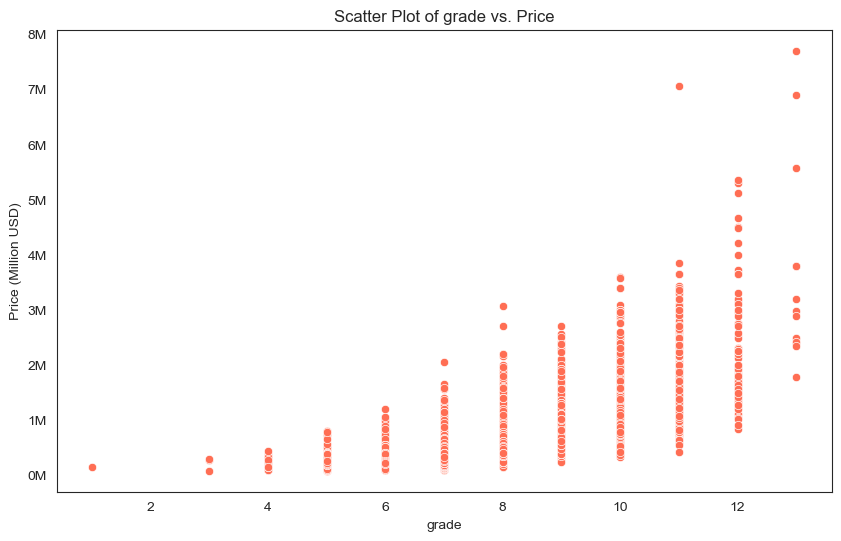

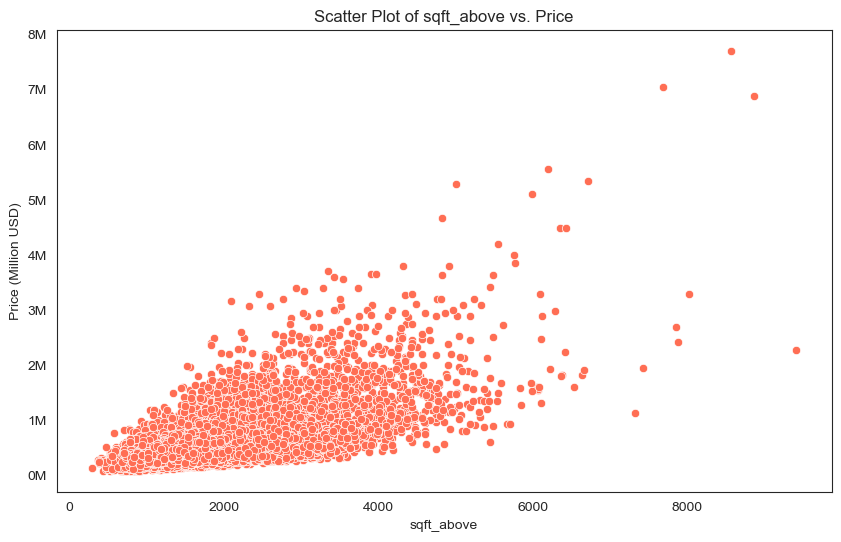

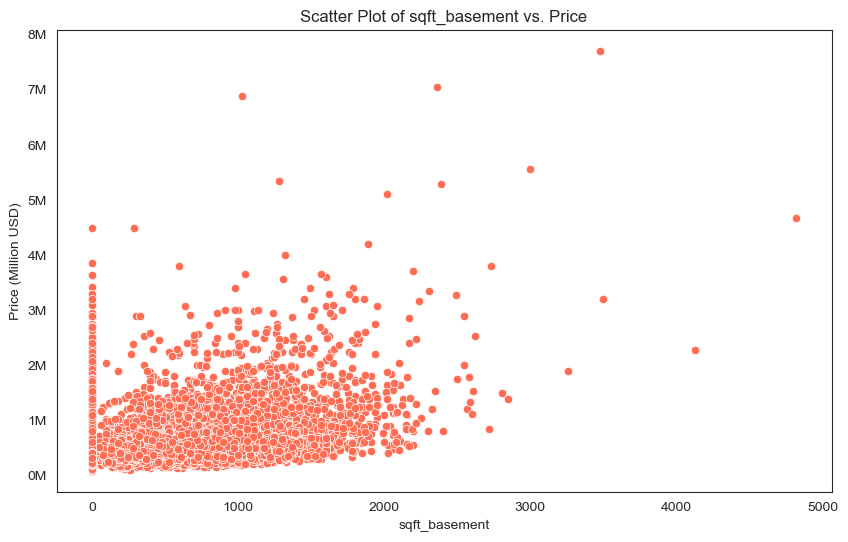

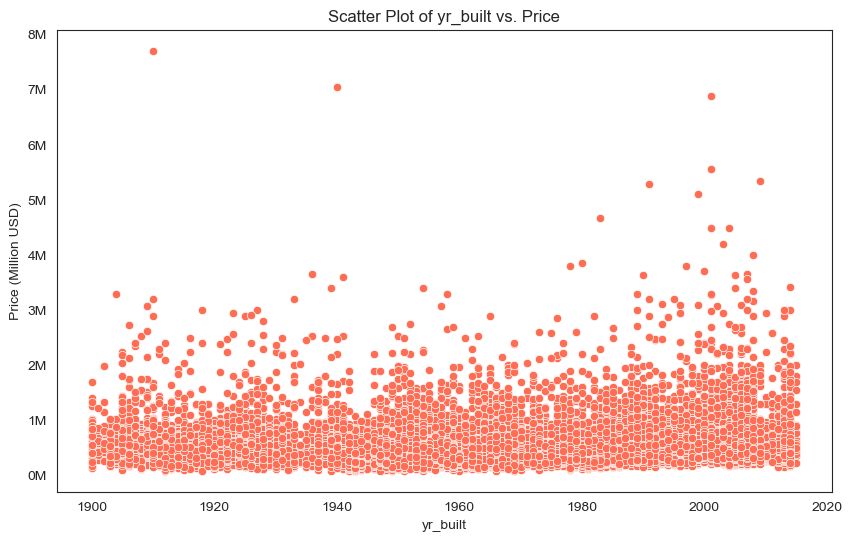

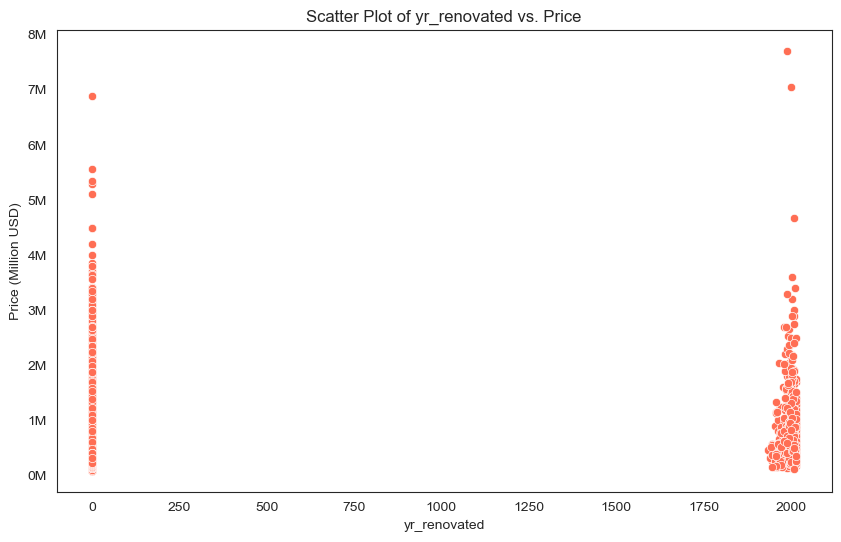

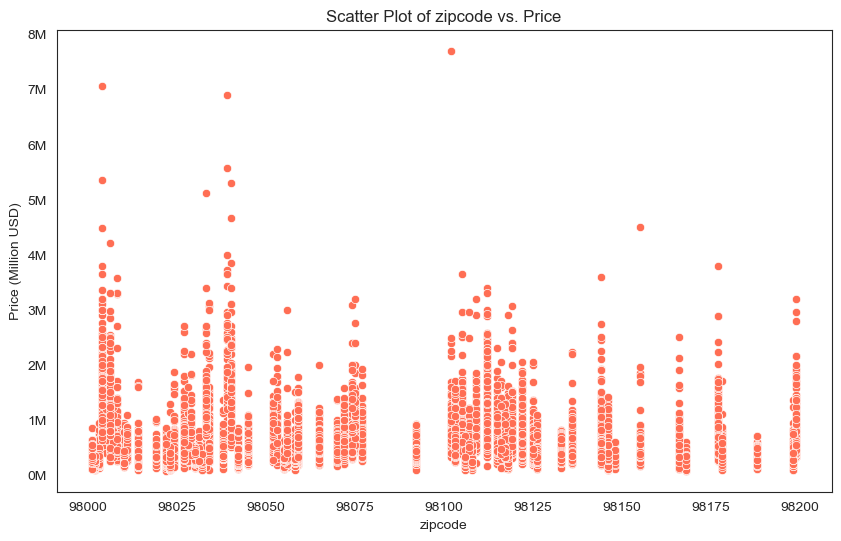

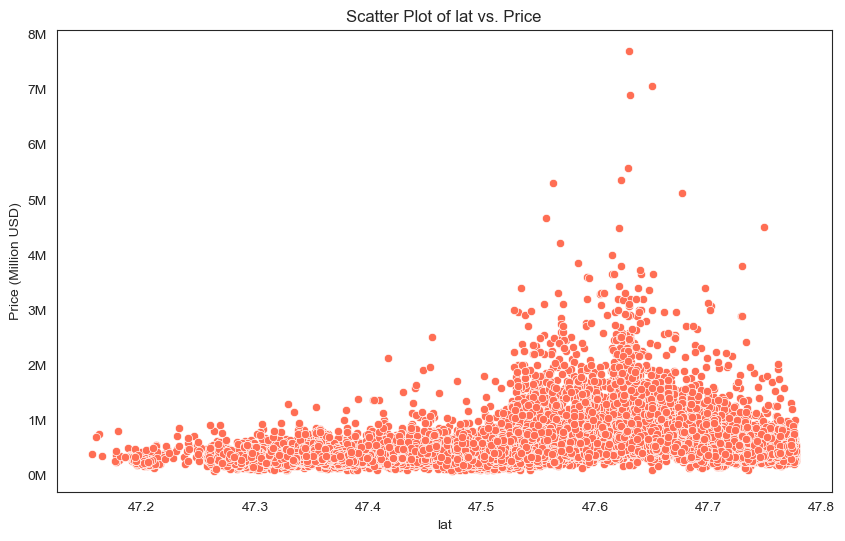

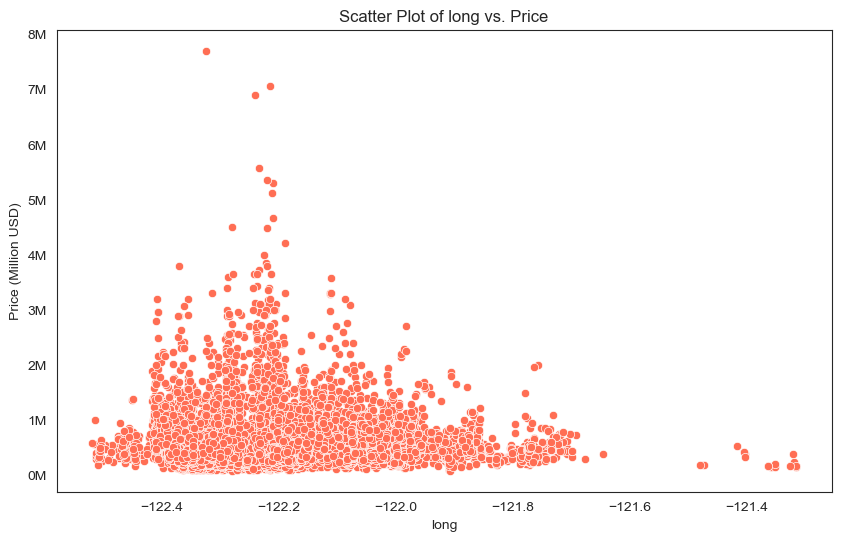

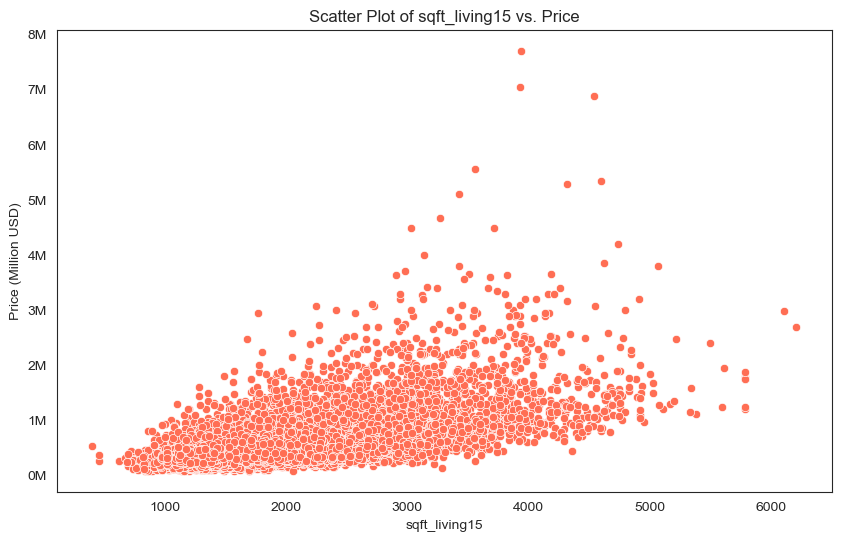

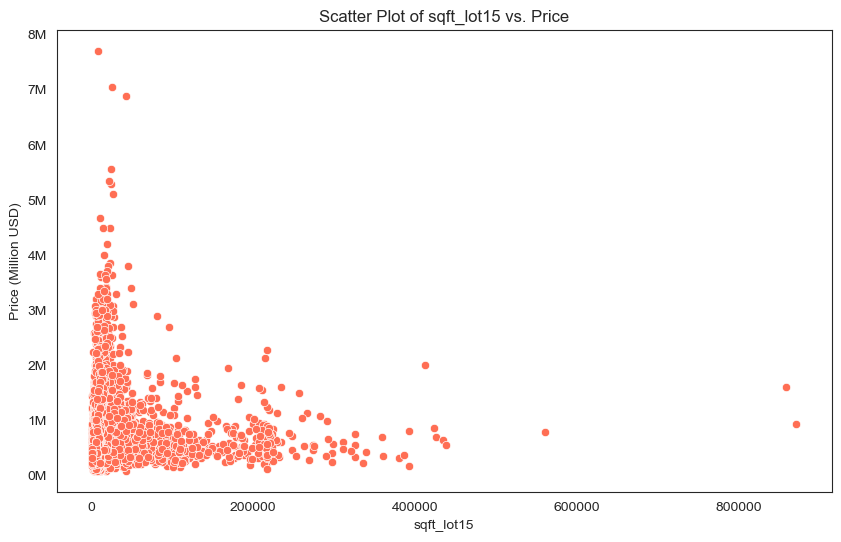

In [15]:
# scatterplots of features vs target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                     'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                     'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Create scatterplots for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.title(f'Scatter Plot of {feature} vs. Price')
    plt.xlabel(feature)
    y_data = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
    y_labels = [f'{int(y / 1e6)}M' for y in y_data]
    plt.yticks(y_data, y_labels)
    plt.ylabel('Price (Million USD)')
    plt.show()

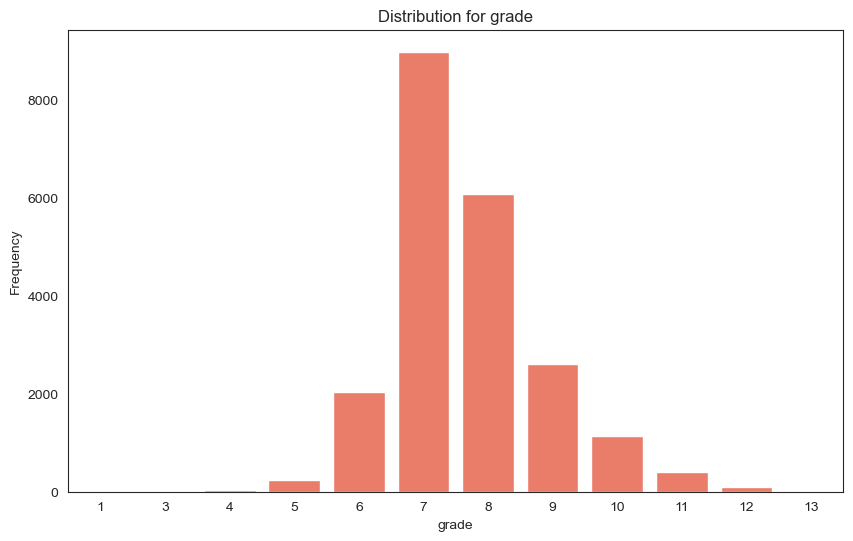

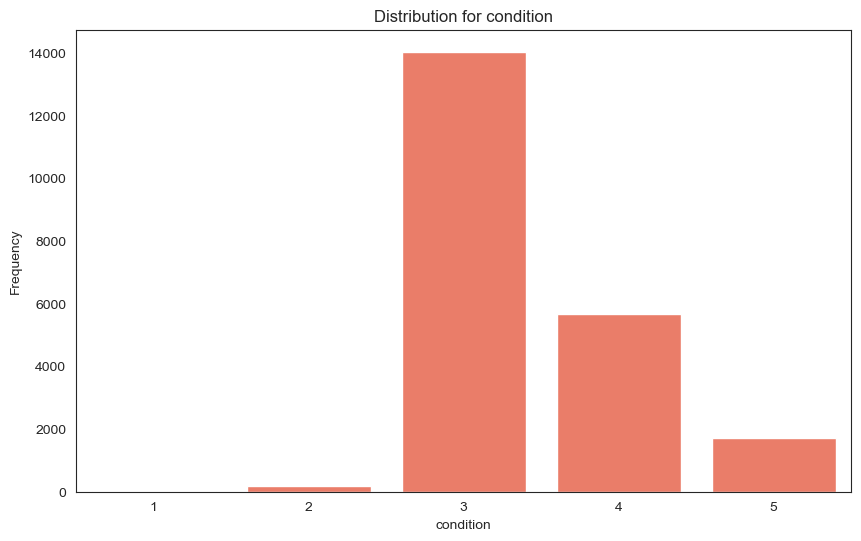

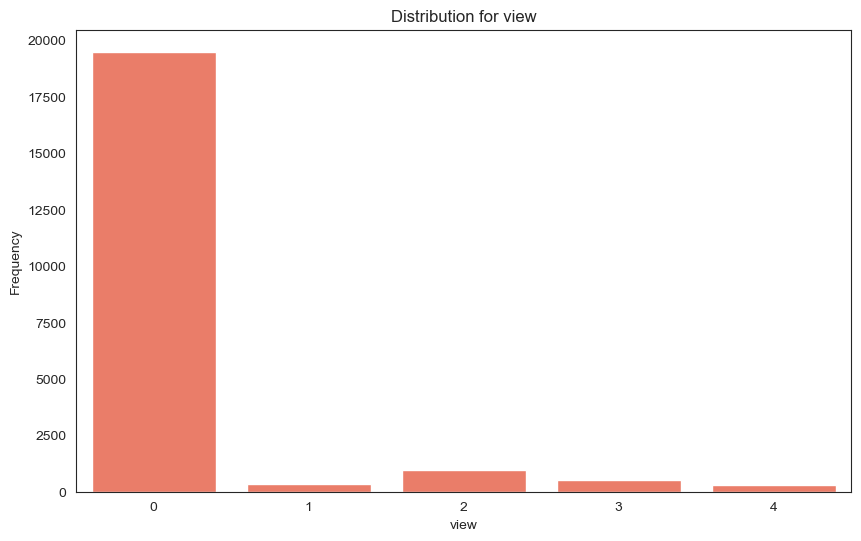

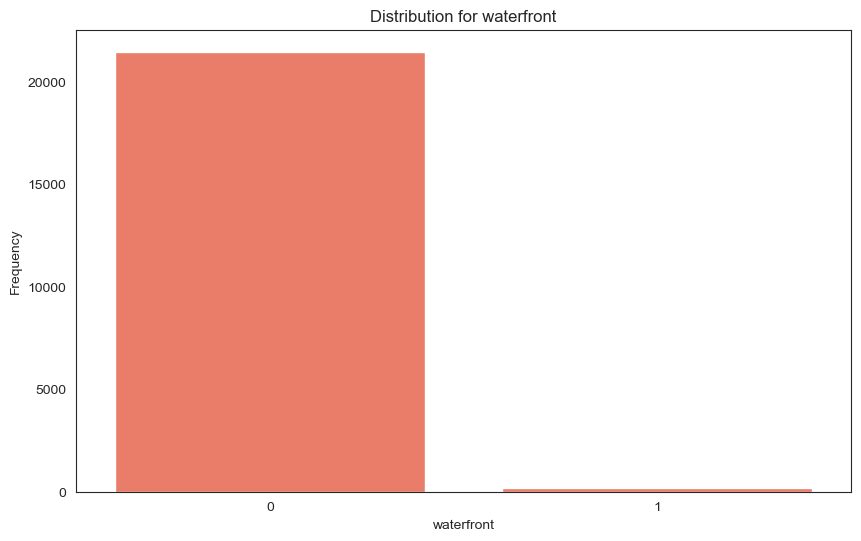

In [16]:
# distribution of discrete features
discrete_cols = ['grade', 'condition', 'view', 'waterfront']
for col in discrete_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

For the category columns;
It can be deduced that houses with a rating of 7 are the most common. Majority of the houses are also in good condition with most of them also having a poor view. A significant majority if the houses lack a waterfront view.

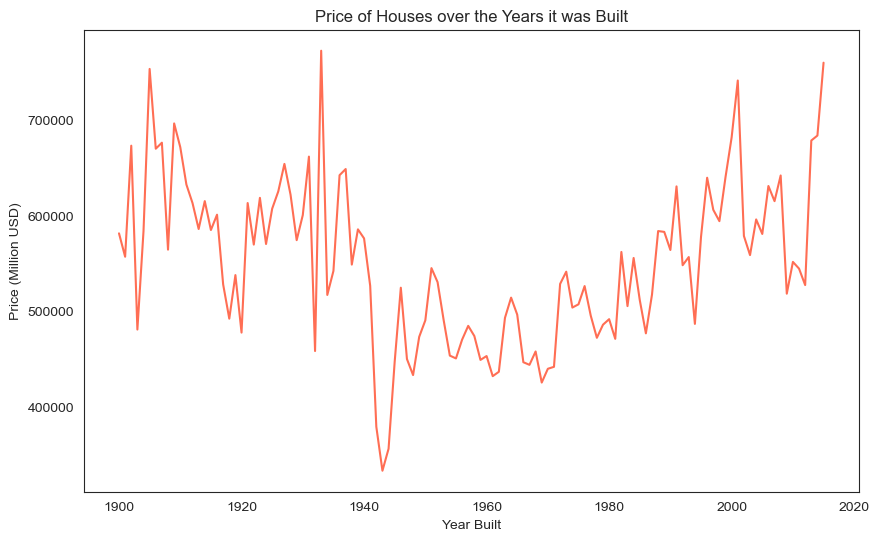

In [17]:
plt.figure(figsize=(10, 6))
# x = df['yr_built'].values
# y = df['price'].values
sns.lineplot(data=df, y='price', x='yr_built', ci=None).set(title='Price of Houses over the Years it was Built',
                                                   ylabel='Price (Million USD)', xlabel='Year Built')
plt.show();

From the line chart above, It appears that the price of houses has increased over time, with a few dips in the early 1900s and around the 1960s. The price of houses seems to have increased more rapidly in recent years. This suggests that the real estate market has been growing steadily over time, with some fluctuations in between.

## Model Training

### **Algorithm Description**

### Simple Linear Regression Model

The algorithm used initially is the Simple Linear Regression. The Simple Linear Regression is a basic
statistical method used to model the relationship between a single independent variable (predictor) and
a dependent variable (target). The predictor variable chosen is the “sqft_living”. It has the highest
correlation with the target variable, “price” amongst other variables. It is also a common predictor for
house prices.

In [18]:
# Spliting the data into training and testing sets
X = df[['sqft_living']]  # Feature (independent variable)
y = df['price']  # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Here, we split the data into training and testing subsets with the former taking 80% and the latter, 20%.**

In [19]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

Here, a simple linear regression model is created using the `LinearRegression()` function. The model is trained on the training data using the `fit()` method, which takes the training data as input. The `predict()` method is then used to make predictions on the test data, which is passed as input to the method. The predicted values are stored in the `y_pred` variable .

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 76570251342.04
Root Mean Squared Error (RMSE): 276713.30
Mean Absolute Error (MAE): 177990.77
R-squared (R2): 0.49


Next the simple Linear Regression model is evaluated using the evaluation metrics below; <br> <br>
The `mean_squared_error()`  calculates the mean squared error between the predicted and actual values of the target variable and it has a value of 76570251342.04. <br>
The `RMSE` is the root of the mean_squared_error at 276,713.30, which means that, on average, the model's predictions are off by approximately 276,713.30 units of the price. <br>
The `mean_absolute_error()` is  the mean absolute error between the predicted and actual values of the target variable. At 177,990.77 , it suggests that, on average, the model's predictions are off by approximately 177,990.77 units of the  price. <br>
The `R-squared value`  is a measure of how well the model fits the data. A score of 0.49 indicates the model  explains about 49% of the variation in the data.

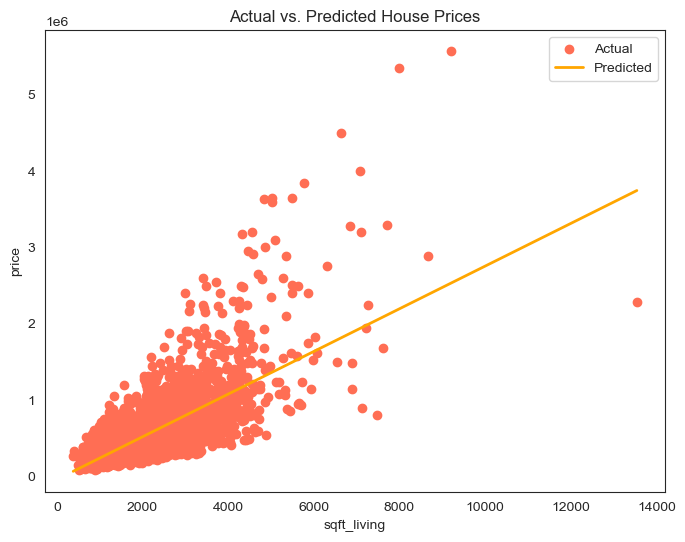

In [21]:
# Visualize the regression line and the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
# Sort X_test for plotting
sorted_indices = X_test.squeeze().argsort()
plt.scatter(X_test, y_test, color='#ff6e54', label='Actual')
plt.plot(X_test.values[sorted_indices], y_pred[sorted_indices], color='#ffa600', linewidth=2, label='Predicted')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.title('Actual vs. Predicted House Prices')
plt.show()

The visualization of the model performance was done above.
The plot shows the relationship between the actual and predicted house prices based on the `sqft_living` variable. The orange line represents the predicted prices and the red dots represent the actual prices. The plot suggests that the predicted prices are generally higher than the actual prices, especially for houses with larger square footage. This could mean that the model is overestimating the prices for larger houses. <br>

The results gotten from the simple linear regression model shows the model is not performing nearly good enough.

#### Using Polynomial Regression and Feature Scaling

SInce the relationship between `sqft_living` and `price` is not purely linear, **Polynomial Regression** will be considered here, it allows for modelling non-linear relationships.

```
# This is formatted as code
```



In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_test_poly)

The data was firstly scaled and transformed using the `StandardScaler()` function. Polynomial features with a degree of 2 was then used and then fitted on the data before then fitting using the Linear Regression model.

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
rmse = mean_squared_error(y_test, y_pred_poly, squared=False)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 82213452351.66
Root Mean Squared Error (RMSE): 286728.88
Mean Absolute Error (MAE): 171882.22
R-squared (R2): 0.46


Evaluation of the results of the Polynomial Regression; <br> <br>
The `mean_squared_error()`  calculates the mean squared error between the predicted and actual values of the target variable and it has a value of 82213452351.66 <br>
The `RMSE` is the root of the mean_squared_error at 276,713.30, which means that, on average, the model's predictions are off by approximately 286,728.88 units of the price. <br>
The `mean_absolute_error()` is  the mean absolute error between the predicted and actual values of the target variable. At 171,882.22 , it suggests that, on average, the model's predictions are off by approximately 171,882.22 units of the  price. <br>
The `R-squared value`  is a measure of how well the model fits the data. A score of 0.46 indicates the model  explains about 46% of the variation in the data.

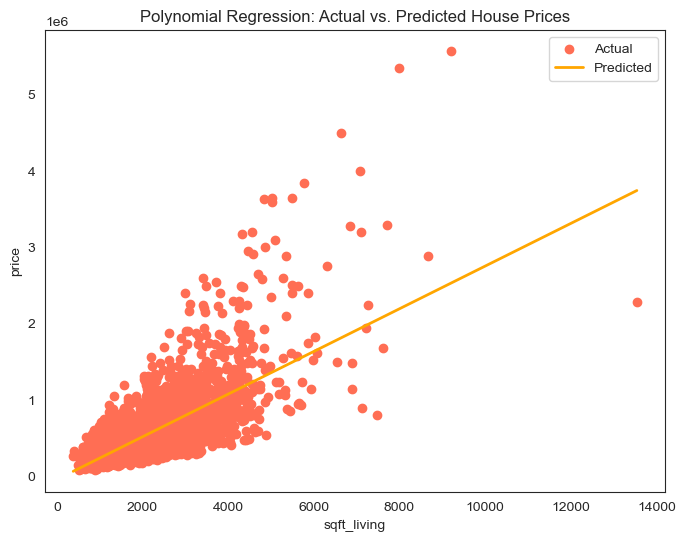

In [24]:
# Visualize the regression line and the scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='#ff6e54', label='Actual')
sorted_indices = X_test_poly[:,1].argsort()
plt.plot(X_test.values[sorted_indices], y_pred[sorted_indices], color='#ffa600', linewidth=2, label='Predicted')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.title('Polynomial Regression: Actual vs. Predicted House Prices')
plt.show()

As can be seen from the above, there was a drop in performance of the  polynomial regression model which could be due to overfitting, which occurs when the model is too complex and fits the noise in the data instead of the underlying relationship between the variable. As the degree of the polynomial increases, the model becomes more complex and may start to overfit the data, leading to a decrease in performance. <br> <br>
Next, we look on to expand the model by adding more features to the data and then build a **Multiple Linear Regression Model**.

# Multiple Linear Regression Model

We now expand the model by including other features from the dataset.

In [25]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

All features in the `df` DataFrame were selected except price and stored in the variable, `X` while the target variable `price` was stored in the variable `y`.

In [26]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 43448473601.18
Root Mean Squared Error (RMSE): 208442.97
Mean Absolute Error (MAE): 127602.99
R-squared (R2): 0.70


Evaluation of the results of the Multiple Linear Regression Model; <br> <br>
The `mean_squared_error()`  calculates the mean squared error between the predicted and actual values of the target variable and it has a value of 43448473601.17 <br>
The `RMSE` is the root of the mean_squared_error at 208,442.97, which means that, on average, the model's predictions are off by approximately 208,442.97 units of the price. <br>
The `mean_absolute_error()` is  the mean absolute error between the predicted and actual values of the target variable. At 127,602.99 , it suggests that, on average, the model's predictions are off by approximately 127,602.99 units of the  price. <br>
The `R-squared value`  is a measure of how well the model fits the data. A score of 0.70 indicates the model  explains about 70% of the variation in the data.

In [28]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with Lasso regularization
model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 43448486747.89
Root Mean Squared Error (RMSE): 208443.01
Mean Absolute Error (MAE): 127603.00
R-squared (R2): 0.70


### Improving performance and Evaluating the model.

Next, we look to try out different methodologies to improve the performance of the model.

#### **Feature Selection**
Here, we try to identify the most important features that have a significant impact on the target variable, `price`.
Four different methods of feature selection was used.

1.   Recursive Feature Addition (RFE): RFE works by recursively removing the least important features based on a model (e.g., a classifier) and selecting the most important features.

2.   Feature Importance-based Selection: This involves using an ensemble model (like a Random Forest) to determine feature importance and selecting the most important features.

3. Mutual Information-based Selection: Mutual information measures the dependency between variables and can be used for feature selection.

4. Correlation-based Feature Selection: This technique involves selecting features that have a high correlation with the target variable.

All methods were tried seperately but the `Correlation-based Feature Selection` method gave the best results with other methods worsening the performance of the model, hence the method is implemented as seen below.



**Correlation-based Feature Selection: This technique involves selecting features that have a high correlation with the target variable**

In [29]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Select the best k features using f_regression scores
selector = SelectKBest(score_func=f_regression, k=18)
X_selected = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_indices]
print(selected_features)

X_new = X[selected_features]
X_new.head()

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Here, the best k features using f_regression scores is selected. The `SelectKBest()` function is used to select the top features based on their scores. The indices and names of the selected features are then obtained using the `get_support()` and `columns` methods, respectively.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 43448473601.18
Root Mean Squared Error (RMSE): 208442.97
Mean Absolute Error (MAE): 127602.99
R-squared (R2): 0.70


Evaluation of the results of the results gotten using feature selection techniques; <br> <br>
The `mean_squared_error()`  calculates the mean squared error between the predicted and actual values of the target variable and it has a value of 43448473601.17 <br>
The `RMSE` is the root of the mean_squared_error at 208,442.97, which means that, on average, the model's predictions are off by approximately 208,442.97 units of the price. <br>
The `mean_absolute_error()` is  the mean absolute error between the predicted and actual values of the target variable. At 127,602.99 , it suggests that, on average, the model's predictions are off by approximately 127,602.99 units of the  price. <br>
The `R-squared value`  is a measure of how well the model fits the data. A score of 0.70 indicates the model  explains about 70% of the variation in the data.

####  **Scaling and Normalization**

Scaling/Standardizing the features ensures that all features have the same scale, which can make it easier for the model to learn the relationships between them. The `StandardScaler()` function will be used to achieve this.

In [32]:
# Normalize all features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
df_normalized = pd.DataFrame(df_scaled, columns=df.columns)
df_normalized.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866419,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005940,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980478,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.173723,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.082161,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [33]:
# Convert the scaled data back to a DataFrame
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X_normalized = df_normalized[features]
y_normalized = df_normalized['price']

# Split the data into training and testing sets
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_normalized, y_train_normalized)

# Make predictions on the test data
y_pred_normalized = model.predict(X_test_normalized)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test_normalized, y_pred_normalized)
rmse = mean_squared_error(y_test_normalized, y_pred_normalized, squared=False)
mae = mean_absolute_error(y_test_normalized, y_pred_normalized)
r2 = r2_score(y_test_normalized, y_pred_normalized)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.32
Root Mean Squared Error (RMSE): 0.57
Mean Absolute Error (MAE): 0.35
R-squared (R2): 0.70


The Mean Squared Error (MSE) was calculated to be 0.32. This value represents the average of the squared differences between the actual house prices and the prices predicted by the model. A lower MSE (0.32) suggests that the model's predictions were very close to the actual prices.

The Root Mean Squared Error (RMSE) is the square root of the MSE. It measures the average size of the prediction errors. With an RMSE of 0.57, the model's predictions were on average about 0.57 units away from the actual house prices.

The Mean Absolute Error (MAE) was found to be 0.35. MAE calculates the average of the absolute differences between the actual and predicted house prices. A lower MAE value (0.35) means that, on average, the model's predictions were approximately 0.35 units off from the actual prices.

The R-squared (R2) value was determined to be 0.70. R2 indicates the proportion of the variance in house prices that the model is able to explain. An R2 score of 0.70 means that the model explains 70% of the variability in house prices, indicating a good level of performance.

####  **Cross Validation**
Cross-validation is a method used to evaluate a linear regression model. It involves splitting the dataset into multiple subsets, training and testing the model on different subsets, and then aggregating the evaluation results.  This way, we can check if the model works well with different parts of the data and get a more reliable measure of its performance to have a more robust assessment of its generalization capabilities.

In [34]:
scores = cross_val_score(model, X_normalized, y_normalized, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean squared error from the negative values obtained from cross_val_score
mse_cv = -scores.mean()
rmse_cv = np.sqrt(mse_cv)
mae_cv = -cross_val_score(model, X_normalized, y_normalized, cv=5, scoring='neg_mean_absolute_error').mean()
r2_cv = cross_val_score(model, X_normalized, y_normalized, cv=5, scoring='r2').mean()

# Print cross-validated metrics
print(f"Cross-Validated Mean Squared Error (MSE): {mse_cv:.2f}")
print(f"Cross-Validated Root Mean Squared Error (RMSE): {rmse_cv:.2f}")
print(f"Cross-Validated Mean Absolute Error (MAE): {mae_cv:.2f}")
print(f"Cross-Validated R-squared (R2): {r2_cv:.2f}")

Cross-Validated Mean Squared Error (MSE): 0.30
Cross-Validated Root Mean Squared Error (RMSE): 0.55
Cross-Validated Mean Absolute Error (MAE): 0.35
Cross-Validated R-squared (R2): 0.69


Evaluation of the results of the Cross Validation Technique;

The Cross-Validated Mean Squared Error (MSE) was computed as 0.30. This value represents the average of the squared differences between the actual house prices and the prices predicted by the model, taking into account a 10-fold cross-validation. The lower MSE (0.30) indicates that the model's predictions, when averaged across different data subsets, were very close to the actual prices.

The Cross-Validated Root Mean Squared Error (RMSE), which is the square root of the cross-validated MSE, measured the average magnitude of the prediction errors across different subsets. After cross-validation, the model's predictions showed an average deviation of about 0.55 units from the actual house prices, considering the model's performance across different data subsets.

The Cross-Validated Mean Absolute Error (MAE) was calculated as 0.35. MAE quantifies the average of the absolute differences between the actual and predicted house prices, considering a 10-fold cross-validation. The lower MAE value (0.35) suggests that, on average, the model's predictions had an approximate deviation of 0.35 units from the actual prices across different data subsets.

The Cross-Validated R-squared (R2) value was determined to be 0.69. R2 represents the proportion of the variance in house prices that the model is able to explain when considering cross-validation. An R2 score of 0.69 indicates that the model is effective in explaining 69% of the variability in house prices, taking into account its performance across different data subsets.

## Conclusion
In the field of real estate, the accurate prediction of house prices is a crucial task that can significantly impact buyers and sellers. In this project, a house price prediction model was developed using linear regression. The project began with a simple linear regression, progressed to multiple linear regression, and explored various techniques to improve the model's performance including Features Selection, Scaling/Normalization and Cross-validation to ensure the model's dependability. The primary goal was to create a robust and precise tool for predicting house prices.

**Highlights**

1. Data Exploration and Preparation: The dataset was thoroughly examined and readied, checking for missing values, the selection of relevant features, and the scaling of data to enhance model performance.

2. Exploratory Data Analysis (EDA): An overview of the EDA aspect involved a comprehensive examination of the dataset's characteristics, distribution, and relationships among variables to gain insights into the data's underlying patterns.

3. Linear Regression Modeling: Both simple and multiple linear regression models were executed, with the latter encompassing the incorporation of numerous features to refine the accuracy of predictions for house prices.

4. Evaluation Metrics: To gauge the model's performance,  various essential regression metrics, were employed such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2).

5. Cross-Validation: We employed cross-validation techniques to assess the model's stability and consistency in diverse data subsets, ultimately providing a more robust evaluation.

**Further Improvements**

While the model has demonstrated competence, there are opportunities for further Improvements:

- Feature Engineering: The exploration of additional feature engineering techniques to create new, more informative features may enhance the model's predictive capacity.

- Regularization: The introduction of regularization techniques, such as Ridge or Lasso regression, can help prevent overfitting and fine-tune model parameters.

- Advanced Algorithms: Experimenting with more advanced regression techniques or ensemble models like Random Forest or Gradient Boosting could potentially lead to better predictive performances.

- Outlier Handling: Identifying and addressing outliers in the dataset may further improve model accuracy.

- Hyperparameter Tuning: Systematic tuning of hyperparameters using techniques like grid search or random search can optimize the model's performance.

- Making Use of External Data: Integrating external data sources, such as local economic indicators, neighborhood characteristics, or property market trends, can enhance prediction accuracy.